<a href="https://colab.research.google.com/github/Matheusmartin04/Matheusmartin04/blob/main/Analise_de_dados_seguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados do Prêmio do seguro**
Essa base de dados trata sobre o valor do prêmio cobrado para cobrir um seguro de saúde. O datset possui as variáveis (Idade, Sexo, IMC, pressão sanguínea, Quantidade de filhos, diabetes, fumante, região, Prêmio)

## **Objetivo da análise:**
* **Etapa 1: Extrair insights das base de dados, buscando responder as perguntas:**
 - Como se dar a distribuição da idades dos clientes?
 - Qual o percentual de clientes pelo gênero?
 - Qual o percentual de clientes diabéticos e fumantes?
 - Como se dar a distribuição dos filhos dos clientes?
 - Existe alguma relação entre o valor do prêmio e o sexo do cliente?
 - Para cliente fumantes o Prêmio pago no seguro é maix caro? e para clientes diabeticos?
* **Etapa 2: Estudar a relação entre valor do prêmio com base nas covariáveis do dataset**
 - Aplicação de um Modelo Linear Generalizado (Gamma)
* **Etapa 3: Prever o valor do prêmio com base nas covariáveis do dataset**


# **Etapas de processamento**

## Importanto as bibliotecas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.font_manager as font_manage
from scipy.stats import kstest, gamma
import statsmodels.api as sm

## Carregando a base e apago os valores faltantes

In [131]:
data = pd.read_csv("/content/drive/MyDrive/FACULDADE/Documents/insurance_data.csv")
data = data.dropna(axis=0)
data= data.dropna()

## Renomeando as colunas

In [132]:
data = data.rename(columns={'index': 'ID', 'age': 'idade',	'gender': 'sexo',
                        'bmi': 'IMC',	'bloodpressure': 'pressao_sanguinia', 
                        'diabetic' : "diabete",	'children': "qtd_filhos",
                        'smoker': 'fumante',	'region':'regiao',	'claim': 'premio'})


In [133]:
data['idade'] = data['idade'].astype(int)
data['pressao_sanguinia'] = data['pressao_sanguinia'].astype(float)
data['qtd_filhos'] = data['qtd_filhos'].astype(int)
data['premio'] = data['premio'].astype(float)
data.head()

,ID,PatientID,idade,sexo,IMC,pressao_sanguinia,diabete,qtd_filhos,fumante,regiao,premio
0,0,1,39,male,23.2,91.0,Yes,0,No,southeast,1121.87
1,1,2,24,male,30.1,87.0,No,0,No,southeast,1131.51
7,7,8,19,male,41.1,100.0,No,0,No,northwest,1146.80
8,8,9,20,male,43.0,86.0,No,0,No,northwest,1149.40
9,9,10,30,male,53.1,97.0,No,0,No,northwest,1163.46


## Substituindo valores na Variável Sexo, Diabete e Fumante

In [134]:
data['sexo'] = data['sexo'].replace({'male': 'Masculino', 'female': 'Feminino'})
data['sexo_dummy'] = np.where(data['sexo'] == 'Masculino', 1, 0)
data['diabete'] = np.where(data['diabete'] == 'Yes', 1, 0)
data['fumante'] = np.where(data['fumante'] == 'Yes', 1, 0)
data.head()

,ID,PatientID,idade,sexo,IMC,pressao_sanguinia,diabete,qtd_filhos,fumante,regiao,premio,sexo_dummy
0,0,1,39,Masculino,23.2,91.0,1,0,0,southeast,1121.87,1
1,1,2,24,Masculino,30.1,87.0,0,0,0,southeast,1131.51,1
7,7,8,19,Masculino,41.1,100.0,0,0,0,northwest,1146.80,1
8,8,9,20,Masculino,43.0,86.0,0,0,0,northwest,1149.40,1
9,9,10,30,Masculino,53.1,97.0,0,0,0,northwest,1163.46,1


# **Etapa 1: Análise Descritivas**

In [99]:
# Conta o número de ocorrências da variavel (gênero, diabetic, Quantidade de fihos e fumante)
sexo_count = data['sexo'].value_counts()
diabete_count = data['diabete'].value_counts()
qtd_filhos_count = data['qtd_filhos'].value_counts()
fumante_count = data['fumante'].value_counts()
regiao_count = data['regiao'].value_counts()

0    1058
1     274
Name: fumante, dtype: int64

## **Distribuição dos clientes por idade**

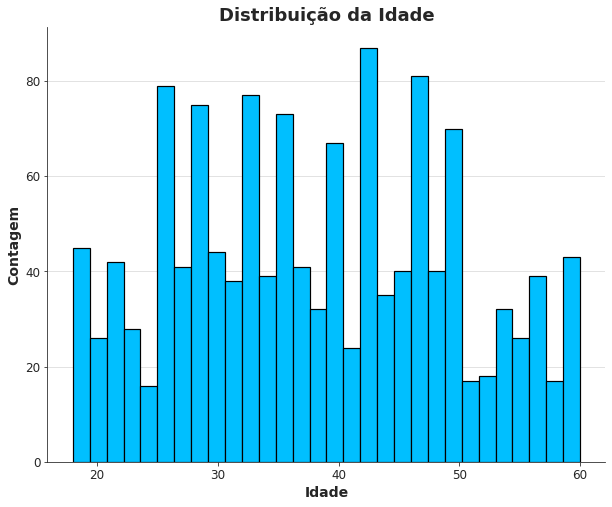

In [67]:
# Seleciona os dados da coluna "age" do seu dataframe "data"
idade = data['idade']

# Cria um gráfico de histograma com as informações de idade
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(idade, bins=30, color='#00BFFF', edgecolor='black', linewidth=1.2)

# Adiciona um título e rótulos dos eixos ao gráfico
ax.set_title("Distribuição da Idade", fontsize=18, fontweight='bold')
ax.set_xlabel("Idade", fontsize=14, fontweight='bold')
ax.set_ylabel("Contagem", fontsize=14, fontweight='bold')

# Adiciona um grid ao fundo do gráfico
ax.grid(axis='y', alpha=0.7)

# Define o tamanho dos rótulos dos eixos e dos valores no gráfico
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove a moldura superior e direita do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o gráfico
plt.show()

### No gráfico acima, que representa o histograma da idade dos clientes. É notável que existe uma grande dispersão desde a idade minino até a idade maxíma, podendo concluir que uma pessoa com qualquer oessoa pode adquirir o plano de saúde.

## **Percentual dos clientes por Sexo**

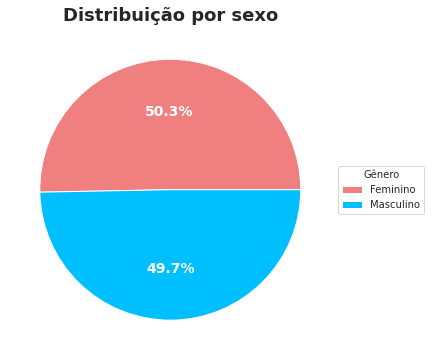

In [68]:
# Define as cores e rótulos das fatias do gráfico
colors = ['#F08080', '#00BFFF']
labels = ['Feminino', 'Masculino']

# Cria um gráfico de setor com as informações de gênero
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie(sexo_count, colors= ['#F08080', '#00BFFF'], autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(wedges, labels, title="Gênero", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Distribuição por sexo", fontsize=18, fontweight='bold')

# Adiciona uma borda branca ao gráfico de setor
ax.set_facecolor('#ffffff')

# Define a fonte e tamanho do texto dentro do gráfico de setor
plt.setp(autotexts, size=14, weight="bold")
plt.setp(texts, size=14)

# Exibe o gráfico
plt.show()

### **Percentual dos clientes diabeticos**

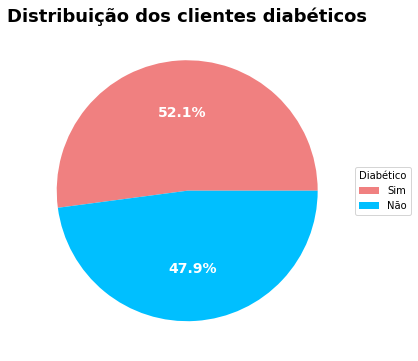

In [10]:
# Define as cores e rótulos das fatias do gráfico
colors = ['#F08080', '#00BFFF']
labels = ['Sim', 'Não']

# Cria um gráfico de setor com as informações de gênero
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie(diabete_count, colors= ['#F08080', '#00BFFF'], autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(wedges, labels, title="Diabético", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Distribuição dos clientes diabéticos", fontsize=18, fontweight='bold')

# Adiciona uma borda branca ao gráfico de setor
ax.set_facecolor('#ffffff')


# Define a fonte e tamanho do texto dentro do gráfico de setor
plt.setp(autotexts, size=14, weight="bold")
plt.setp(texts, size=14)

# Exibe o gráfico
plt.show()

### **Percentual de clientes fumantes**

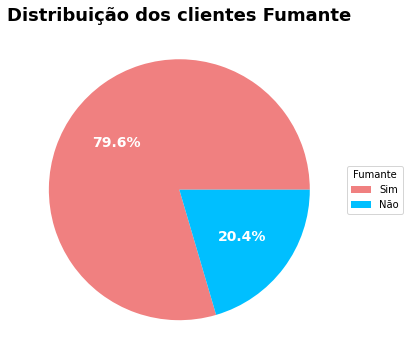

In [11]:
# Define as cores e rótulos das fatias do gráfico
colors = ['#F08080', '#00BFFF']
labels = ['Sim', 'Não']

# Cria um gráfico de setor com as informações de gênero
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie(fumante_count, colors= ['#F08080', '#00BFFF'], autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(wedges, labels, title="Fumante", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Distribuição dos clientes Fumante", fontsize=18, fontweight='bold')

# Adiciona uma borda branca ao gráfico de setor
ax.set_facecolor('#ffffff')

# Define a fonte e tamanho do texto dentro do gráfico de setor
plt.setp(autotexts, size=14, weight="bold")
plt.setp(texts, size=14)

# Exibe o gráfico
plt.show()

### Nos últimos 3 gráficos mostrado acima, é possivel notar que o plano está bem equilibrado quando se trata de mulheres e homens. que cerca de 52,1% da população é diabética e que quase 80% dos cliente tem o hábito de fumar.

### **Boxplot da idade por gênero**

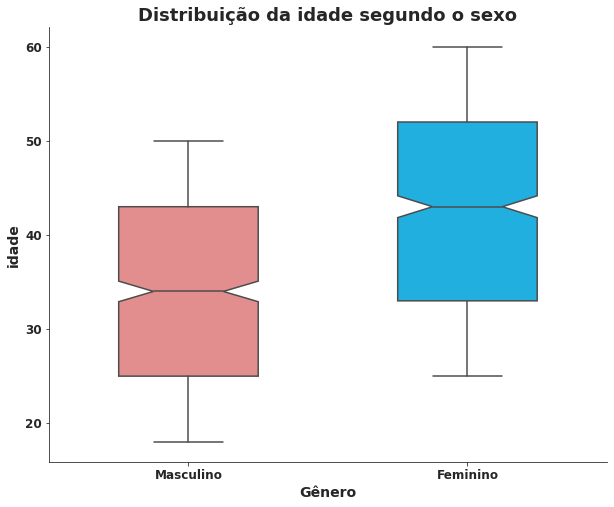

In [69]:
# Cria um gráfico de boxplot com as informações de idade e gênero
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='sexo', y='idade', data=data, width=0.5, palette=['#F08080', '#00BFFF'], notch=True, ax=ax)

# Adiciona um título e rótulos dos eixos ao gráfico
ax.set_title("Distribuição da idade segundo o sexo", fontsize=18, fontweight='bold')
ax.set_xlabel("Gênero", fontsize=14, fontweight='bold')
ax.set_ylabel("idade", fontsize=14, fontweight='bold')

# Define o estilo de fonte
plt.rcParams['font.family'] = 'Arial'

# Define o tamanho dos rótulos dos eixos e dos valores no gráfico
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove a moldura superior e direita do gráfico
sns.despine()

# Exibe o gráfico de boxplot
plt.show()

### O grupo masculino é mais jovem variando de 18 anos à 50 anos, quando comparado com o grupo feminino, que possui uma idade mínima de 25 anos e máxima de 60. 




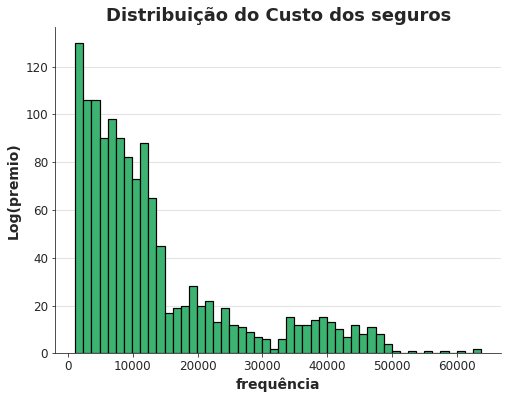

In [70]:
# Seleciona os dados da coluna "age" do seu dataframe "data"
sns.set_style('ticks')

# Cria um gráfico de histograma com as informações de idade
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(data['premio'], bins=50, color='#3CB371', edgecolor='black', linewidth=1.2)

# Adiciona um título e rótulos dos eixos ao gráfico
ax.set_title("Distribuição do Custo dos seguros", fontsize=18, fontweight='bold')
ax.set_xlabel("Prêio", fontsize=14, fontweight='bold')
ax.set_ylabel("Frequência", fontsize=14, fontweight='bold')

# Adiciona um grid ao fundo do gráfico
ax.grid(axis='y', alpha=0.7)

# Define o estilo de fonte
plt.rcParams['font.family'] = 'Arial'

# Define o tamanho dos rótulos dos eixos e dos valores no gráfico
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove a moldura superior e direita do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o gráfico
plt.show()

### Ao plotar o histograma dos prêmios pago pelos clientes, é possivel notar que existe uma grande frequência que paga até R$ 30.000,00, na medida que o prêmio aumenta a frequência vai diminuindo. No gráfico é possivel notar frequências acima de 50 mil, o que pode ser possivéis candidatos a Outliers.

## **Verificando a existência de Outliers do Prêmio do seguro por sexo**

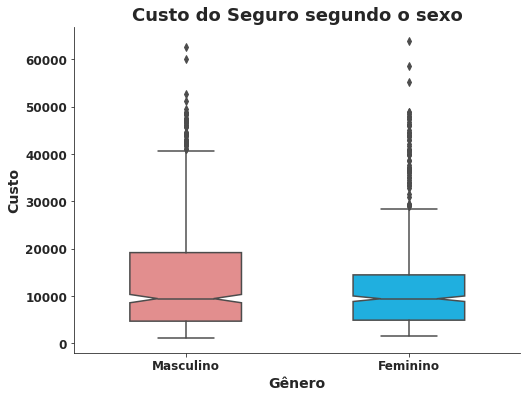

In [71]:
# Seleciona os dados da coluna "age" do seu dataframe "data"
# Cria um gráfico de boxplot com as informações de idade e gênero
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='sexo', y='premio', data=data, width=0.5, palette=['#F08080', '#00BFFF'], notch=True, ax=ax)

# Adiciona um título e rótulos dos eixos ao gráfico
ax.set_title("Custo do Seguro segundo o sexo", fontsize=18, fontweight='bold')
ax.set_xlabel("Gênero", fontsize=14, fontweight='bold')
ax.set_ylabel("Custo", fontsize=14, fontweight='bold')

# Define o estilo de fonte
plt.rcParams['font.family'] = 'Arial'

# Define o tamanho dos rótulos dos eixos e dos valores no gráfico
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove a moldura superior e direita do gráfico
sns.despine()

# Exibe o gráfico de boxplot
plt.show()

### Analisando o gráfico acima, é possivél ver que a média para os dois grupos são semelhantes, mas existe uma variação maior para o prêmio pagos pelos homens. Alem disso, é possivel notar a existências de outliers para os dois grupos.

## **Distribuição do prêmio do seguro por Sexo**

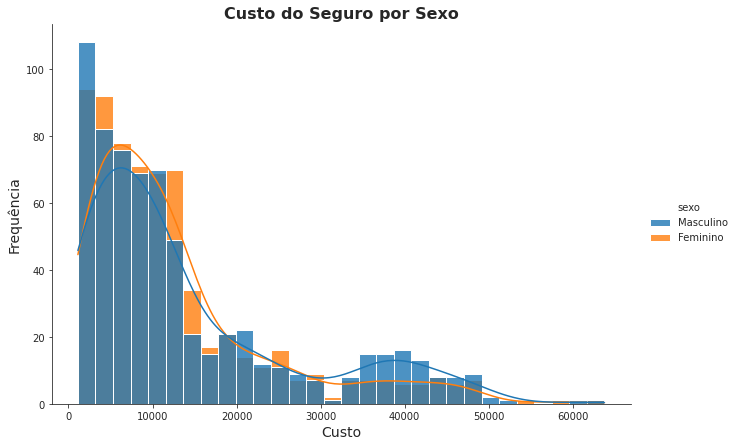

In [72]:
# Definindo o estilo do grafico
sns.set_style('ticks')

# criando o grafico
g = sns.displot(data, x='premio', hue='sexo', kde=True, bins=30, alpha=0.8, height=6, aspect=1.5)

# nomes nos eixos e titulo
plt.xlabel('Custo', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Custo do Seguro por Sexo', fontsize=16, fontweight='bold')

# mostrando o grafico
plt.show()

### No gráfico acima, mostra o histograma e a densidade do valor pago pelo cliente ao contratar um seguro de saúde, por sexo. É possivel ver prls curva de densidade que as mulheres tem uma frequência maior até os planos que custam R$ 20.000,00 reais, a partir disso, os clientes dos sexos masculinos passam a ter uma aumento na frequência.

In [ ]:
# Criando o gráfico de dispersão
#g = sns.scatterplot(data=data, x='idade', y='premio')

# Definindo nomes dos eixos e título
#g.set(xlabel='Idade', ylabel='Custo do seguro', title='Custo do seguro por idade')

# Exibindo o gráfico
#sns.despine()

## **Para clientes fumantes ou diabeticos, o Prêmio pago no seguro é mais caro?**

In [73]:
# Média do prêmio para variavel diabetes.
mean_by_diabetes = data.groupby('diabete')['premio'].mean()
print(f"A média do valor do prêmio pago quando o cliente é diabético é: {round(mean_by_diabetes[1],2)}")
print(f"A média do valor do prêmio pago quando o cliente não é diabético é: {round(mean_by_diabetes[0],2)}")
# Média do prêmio para variavel fumante.
mean_by_fumante = data.groupby('fumante')['premio'].mean()
print(f"A média do valor do prêmio pago quando o cliente é fumante é: {round(mean_by_fumante[1],2)}")
print(f"A média do valor do prêmio pago quando o cliente não é fumante é: {round(mean_by_fumante[0],2)}")

A média do valor do prêmio pago quando o cliente é diabético é: 13236.48
A média do valor do prêmio pago quando o cliente não é diabético é: 13406.6
A média do valor do prêmio pago quando o cliente é fumante é: 32050.23
A média do valor do prêmio pago quando o cliente não é fumante é: 8475.86


### O prêmio do seguro pago pelos clientes quando o cliente é diabético é equivalente ao premio pago por aqueles que não são diabético. Por outro lado, ser fulmante ou não, impacta significamente no valor do prêmio a pagar, a média do prêmio pago pelos cliente fulmante é de R$ 32.050,23 e para clientes não fulmantes é de R\$ 8.475,86.

# **Etapa 2: Modelagem do prêmio do seguro**

### Ao estudar o prêmio do seguro, percebeu-se que existe uma grande frequência no valores iniciais. Pressupõe-se que a variável não segue uma distribuição linear, portanto, buscarei esforço para modelar o prêmio do seguro pelos Modelo Lineares Generalizados, um possivél candidato é a distribuição Gamma, por ter seu grafico de densidade semelhante ao do prêmio do seguro e com ligação logarítima, que ao aplicar a tranformação no variável prêmio, o gráfico apresentada normalidade, conforme o gráfico abaixo


## **Histograma do log(prêmio)**

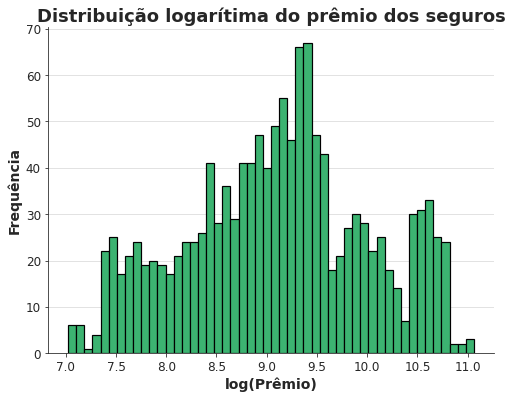

In [136]:
# Seleciona os dados da coluna "age" do seu dataframe "data"
sns.set_style('ticks')

# Cria um gráfico de histograma com as informações de idade
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.log(data['premio']), bins=50, color='#3CB371', edgecolor='black', linewidth=1.2)

# Adiciona um título e rótulos dos eixos ao gráfico
ax.set_title("Distribuição logarítima do prêmio dos seguros", fontsize=18, fontweight='bold')
ax.set_xlabel("log(Prêmio)", fontsize=14, fontweight='bold')
ax.set_ylabel("Frequência", fontsize=14, fontweight='bold')

# Adiciona um grid ao fundo do gráfico
ax.grid(axis='y', alpha=0.7)

# Define o estilo de fonte
plt.rcParams['font.family'] = 'Arial'

# Define o tamanho dos rótulos dos eixos e dos valores no gráfico
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove a moldura superior e direita do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o gráfico
plt.show()


### **Modelo Proposto**

- $Prêmio\sim Gama(a,b)$  
- $\eta=\beta_0+\beta_1IMC+\beta_2\cdot Quantidade de filhos+\beta_3\cdot Fumante$  
- $\ln\left(\mu\right)=\eta$.


In [137]:
#Distribuição Gamma com ligação canônica Log
distribuicao = sm.genmod.families.Gamma(link=sm.genmod.families.links.log())
# Gerando o modelo
modelo = sm.GLM(data['premio'], sm.add_constant(data[['IMC','qtd_filhos','fumante']]), family=distribuicao)
#Resultado do modelo
resultado = modelo.fit()
print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 premio   No. Observations:                 1332
Model:                            GLM   Df Residuals:                     1328
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                         0.42113
Method:                          IRLS   Log-Likelihood:                -13463.
Date:                Sun, 26 Feb 2023   Deviance:                       536.25
Time:                        16:12:39   Pearson chi2:                     559.
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3887      0.093     90.682      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## **Interpretação do modelo**



### $\hat\mu=e^{8,3887+0,190\cdot IMC+0,0623\cdot Quantidade de filhos+1,3062 Fumante\cdot Quantidade de filhos}=e^{8,3887}\cdot e^{0,1453\cdot IMC}\cdot e^{0,0166\cdot Quantidade de filhos}\cdot e^{1,3062\cdot Fumante}$

- Quando todas as covariáveis são zero, a média do prêmio pago pelo pelo cliente é de $e^{8,3887} = 4397.09$, o que faz muito sentindo pelo fato de considerar o $IMC = 0$ que é considerado abaixo do peso.
- Estima-se que quando há o aumento de uma unidade no Indice de Massa Corporal - IMC, a média do prêmio do seguro aumenta em $e^{0,019} = 1.0192$,  Isto é, ele aumenta, em média, cerca de 1,92%.
- Estima-se que quando há o aumento de uma unidade na quantidade de filhos, a média do prêmio do seguro aumenta em $e^{0,0166} = 1.0166$,  Isto é, ele aumenta, em média, cerca de 1,66%.
- Estima-se que quando o cliente é fumante, a média do prêmio pelo seguro aumenta em $e^{1,3062} = 3.6921$, ou seja, o Prêmio do seguro fica 3,69 vezes maior.

# **Etapa 3: Predição do modelo**